In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

from fairpair import *

In [2]:
import multiprocessing
from workers import *

## Contained in Ranking (Giant Strongly Connected Component)

In [3]:
if __name__ == '__main__':
    pool = multiprocessing.Pool()
    contained = pool.map(get_representation, range(0,10))
    contained = [result for pool in contained for result in pool]
    contained = pd.DataFrame(contained, columns=['trial', 'iteration', 'share giant component', 'group'])
    contained

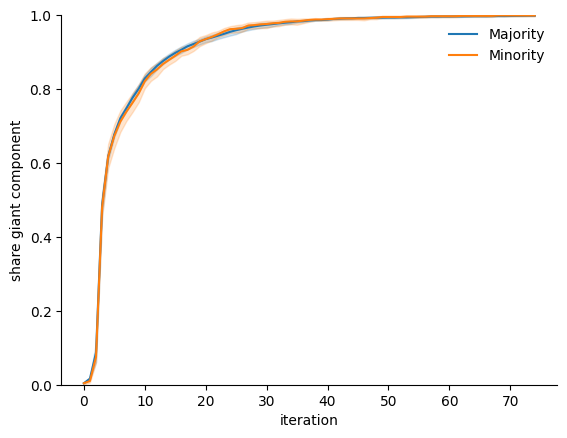

In [4]:
ax = sns.lineplot(contained, x='iteration', y='share giant component', hue='group', hue_order=['Majority', 'Minority'])
ax.legend(title=None, frameon=False)
ax.set(ylim=(0, 1))
sns.despine()

## Accuracy

In [13]:
if __name__ == '__main__':
    pool = multiprocessing.Pool()
    accuracy = pool.map(get_accuracy, range(0,10))
    accuracy = [result for pool in accuracy for result in pool]
    accuracy = pd.DataFrame(accuracy, columns=['trial', 'iteration', 'Spearman\'s rho', 'group'])
    accuracy

Strongly connected after 15 iterations.
Strongly connected after 15 iterations.
Strongly connected after 16 iterations.
Strongly connected after 17 iterations.
Strongly connected after 18 iterations.
Strongly connected after 19 iterations.
Strongly connected after 19 iterations.
Strongly connected after 21 iterations.
Strongly connected after 26 iterations.
Strongly connected after 27 iterations.


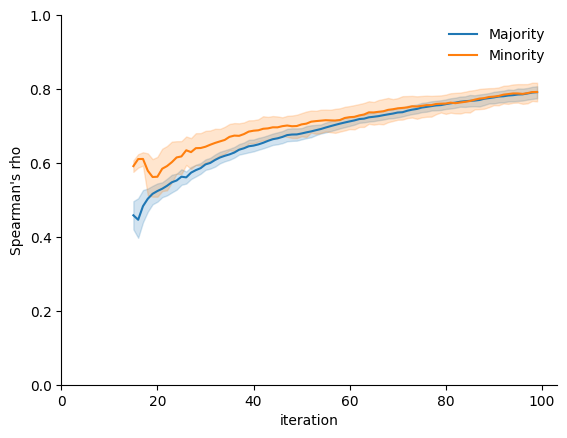

In [14]:
ax = sns.lineplot(accuracy, x='iteration', y='Spearman\'s rho', hue='group', hue_order=['Majority', 'Minority'])
ax.legend(title=None, frameon=False)
ax.set(ylim=(0, 1), xlim=(0,None)) #ax.set(ylim=(0, 40000))
sns.despine()

## Star Graph Accuracy

In [7]:
from itertools import product
tasks = list(product(range(20), np.arange(0.1,1.01,0.05)))

if __name__ == '__main__':
    pool = multiprocessing.Pool()
    accuracy = pool.starmap(get_star_graph, tasks)
    accuracy = [result for pool in accuracy for result in pool]
    accuracy = pd.DataFrame(accuracy, columns=['trial', 'stariness', 'iteration', 'mean squared error'])
    accuracy

Strongly connected after 18 iterations.
Strongly connected after 19 iterations.
Strongly connected after 23 iterations.
Strongly connected after 19 iterations.
Strongly connected after 25 iterations.
Strongly connected after 29 iterations.
Strongly connected after 31 iterations.
Strongly connected after 31 iterations.
Strongly connected after 30 iterations.
Strongly connected after 36 iterations.
Strongly connected after 29 iterations.
Strongly connected after 28 iterations.
Strongly connected after 29 iterations.
Strongly connected after 35 iterations.
Strongly connected after 21 iterations.
Strongly connected after 44 iterations.
Strongly connected after 24 iterations.
Strongly connected after 25 iterations.
Strongly connected after 24 iterations.
Strongly connected after 23 iterations.
Strongly connected after 38 iterations.
Strongly connected after 29 iterations.
Strongly connected after 38 iterations.
Strongly connected after 42 iterations.
Strongly connected after 42 iterations.


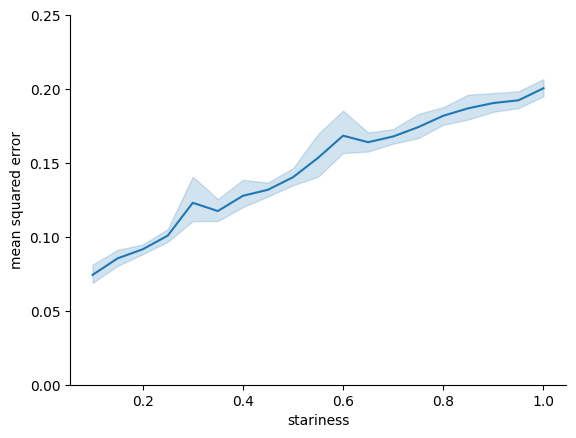

In [8]:
end_result = accuracy[accuracy.iteration == 5]
ax = sns.lineplot(end_result, x='stariness', y='mean squared error')
#ax.legend(title=None, frameon=False)
ax.set(ylim=(0, 0.25)) #ax.set(ylim=(0, 40000))
sns.despine()

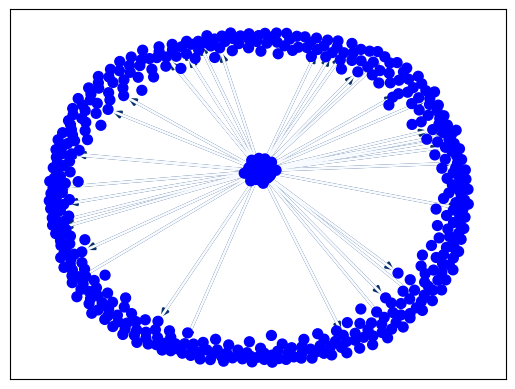

In [9]:
connected = False
H = FairPairGraph()
H.generate_groups(500, 100)
H.group_assign_scores(nodes=H.nodes, distr=Distributions.normal_distr)
sampler = StargraphSampling(H, warn=False)
ranker = RankRecovery(H)
sampler.apply(iter=5, k=1, f=0.1, node_prob=1.0)
# apply davidScore for ranking recovery
ranking, other_nodes = ranker.apply(rank_using=davidScore) # by default, apply rankCentrality method
#pos=nx.drawing.layout.spring_layout(H)
#colors = ['red' if node[1]['minority'] else 'blue' for node in G.nodes(data=True)]
colors = ['red' if node == 0 else 'blue' for node in H.nodes]
edges,weights = zip(*nx.get_edge_attributes(H,'weight').items())
nx.drawing.nx_pylab.draw_networkx(H, node_color=colors, with_labels=False, node_size=50, edge_color=weights, width=2, edge_cmap=plt.cm.Blues)